# Libraries - Mine

In [62]:
# Import needed Libraries

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Prepartion

In [63]:
#load data
df_purchase = pd.read_csv('purchase data.csv')

#import scaler
scaler = pickle.load(open('scaler.pickle', 'rb'))

#import pca
pca = pickle.load(open('pca.pickle', 'rb'))

#import k-means
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

#standardization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

#apply PCA
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

#segment data
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

#Create a copy of the data frame
df_purchase_predictors = df_purchase.copy()

#add segment labels
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

# Purchase Probabilty Model

In [64]:
Y = df_pa['Incidence']

In [65]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                  df_pa['Price_2'] +
                  df_pa['Price_3'] +
                  df_pa['Price_4'] +
                  df_pa['Price_5'] ) / 5

In [66]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
model_purchase.coef_

array([[-2.356142]])

# Price Elasticity of Purchase Probability

In [68]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [69]:
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [70]:
df_price_range = pd.DataFrame(price_range)

In [71]:
Y_pr = model_purchase.predict_proba(df_price_range)

In [72]:
Y_pr

array([[0.08148917, 0.91851083],
       [0.08327019, 0.91672981],
       [0.08508653, 0.91491347],
       [0.08693873, 0.91306127],
       [0.08882734, 0.91117266],
       [0.0907529 , 0.9092471 ],
       [0.09271595, 0.90728405],
       [0.09471704, 0.90528296],
       [0.09675671, 0.90324329],
       [0.09883551, 0.90116449],
       [0.10095399, 0.89904601],
       [0.10311267, 0.89688733],
       [0.10531211, 0.89468789],
       [0.10755283, 0.89244717],
       [0.10983538, 0.89016462],
       [0.11216028, 0.88783972],
       [0.11452806, 0.88547194],
       [0.11693925, 0.88306075],
       [0.11939435, 0.88060565],
       [0.12189388, 0.87810612],
       [0.12443835, 0.87556165],
       [0.12702824, 0.87297176],
       [0.12966406, 0.87033594],
       [0.13234627, 0.86765373],
       [0.13507536, 0.86492464],
       [0.13785179, 0.86214821],
       [0.140676  , 0.859324  ],
       [0.14354844, 0.85645156],
       [0.14646953, 0.85353047],
       [0.14943969, 0.85056031],
       [0.

In [73]:
purchase_pr = Y_pr[:, 1]

In [74]:
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [75]:
df_price_elasticities = pd.DataFrame(price_range)

In [76]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: 'Price_Point'})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities.head(11)

,Price_Point,Mean_PE
0,0.50,-0.096000
1,0.51,-0.100060
2,0.52,-0.104247
3,0.53,-0.108565
4,0.54,-0.113017
5,0.55,-0.117605
6,0.56,-0.122333
7,0.57,-0.127205
8,0.58,-0.132224
9,0.59,-0.137394


In [77]:
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096000
1,0.51,-0.100060
2,0.52,-0.104247
3,0.53,-0.108565
4,0.54,-0.113017
5,0.55,-0.117605
6,0.56,-0.122333
7,0.57,-0.127205
8,0.58,-0.132224
9,0.59,-0.137394


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

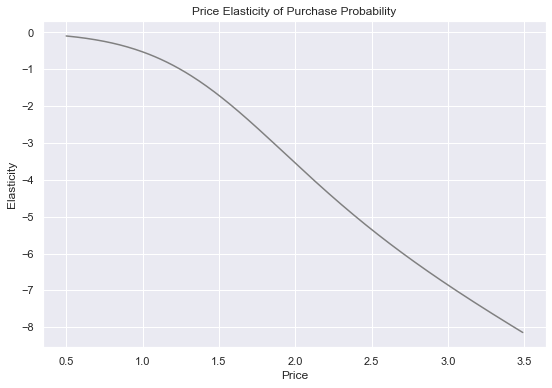

In [78]:
plt.figure(figsize = (9,6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

# Purchase Probability by Segments

## Segment 1 - Career Focused

In [79]:
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

In [80]:
Y = df_pa_segment_1['Incidence']

In [81]:
X = pd.DataFrame()

In [82]:
X['Mean_Price'] = (df_pa_segment_1['Price_1'] +
                  df_pa_segment_1['Price_2'] +
                  df_pa_segment_1['Price_3'] +
                  df_pa_segment_1['Price_4'] +
                  df_pa_segment_1['Price_5'] ) / 5

In [83]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
model_incidence_segment_1.coef_

array([[-1.71131695]])

In [85]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

In [86]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1
df_price_elasticities.head(11)

,Price_Point,Mean_PE,PE_Segment_1
0,0.50,-0.096000,-0.119114
1,0.51,-0.100060,-0.123297
2,0.52,-0.104247,-0.127573
3,0.53,-0.108565,-0.131945
4,0.54,-0.113017,-0.136412
5,0.55,-0.117605,-0.140977
6,0.56,-0.122333,-0.145641
7,0.57,-0.127205,-0.150406
8,0.58,-0.132224,-0.155273
9,0.59,-0.137394,-0.160244


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

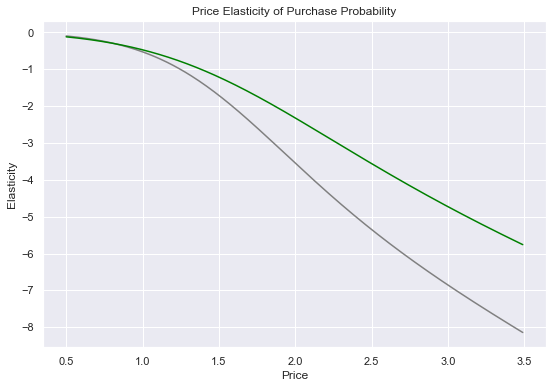

In [87]:
plt.figure(figsize = (9,6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [88]:
# Select only customers from segment 2, the fewer-opportunities.
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]

In [89]:
# Logistic regression model
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

# Calculate price elasticities
model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

In [90]:
df_price_elasticities['PE_Segment_2'] = pe_segment2

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

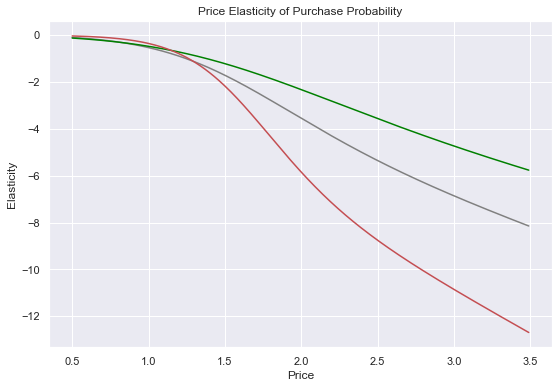

In [91]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

# Segment 3

In [92]:
# Select only customers from segment 2, the fewer-opportunities.
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]

In [93]:
# Logistic regression model
Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5

model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

# Calculate price elasticities
model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment3.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range * ( 1 - purchase_pr_segment3)

In [94]:
df_price_elasticities['PE_Segment_3'] = pe_segment3

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

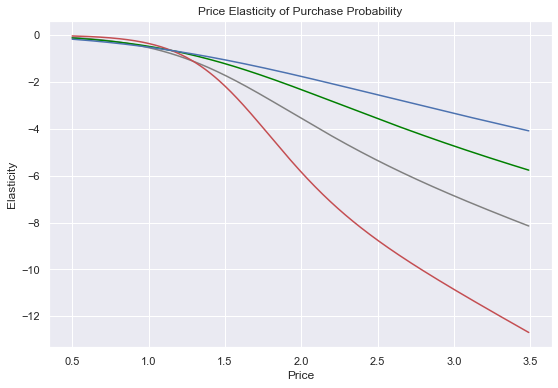

In [95]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment3, color = 'b')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## data prep

In [96]:
Y = df_pa['Incidence']

In [97]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + 
                   df_pa['Price_2'] + 
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

In [98]:
X['Mean_Promotion'] = (df_pa['Promotion_1'] + 
                       df_pa['Promotion_2'] + 
                       df_pa['Promotion_3'] + 
                       df_pa['Promotion_4'] + 
                       df_pa['Promotion_5']) / 5

In [99]:
X.head(10)

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0
5,2.028,0.0
6,2.030,0.0
7,2.030,0.0
8,1.932,0.6
9,1.932,0.6


## Model Estimiation

In [100]:
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.49063152,  0.56070896]])

## Price Elasticity with Promotion

In [101]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: 'Price_Range'})

In [102]:
df_price_elasticity_promotion['Promotion'] = 1

In [103]:
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [104]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [105]:
df_price_elasticities['Elasticitity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticitity_Promotion_1
0,0.50,-0.096000,-0.119114,-0.030917,-0.168048,-0.125436
1,0.51,-0.100060,-0.123297,-0.032684,-0.172972,-0.129538
2,0.52,-0.104247,-0.127573,-0.034538,-0.177967,-0.133720
3,0.53,-0.108565,-0.131945,-0.036482,-0.183032,-0.137981
4,0.54,-0.113017,-0.136412,-0.038521,-0.188169,-0.142322
5,0.55,-0.117605,-0.140977,-0.040659,-0.193378,-0.146745
6,0.56,-0.122333,-0.145641,-0.042901,-0.198659,-0.151250
7,0.57,-0.127205,-0.150406,-0.045250,-0.204012,-0.155839
8,0.58,-0.132224,-0.155273,-0.047712,-0.209439,-0.160513
9,0.59,-0.137394,-0.160244,-0.050292,-0.214939,-0.165271


## brand choice

### data preparation

In [106]:
brand_choice = df_pa[df_pa['Incidence'] == 1]

In [107]:
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,2,0,0,1,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,2,0,0,1,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,2,0,0,1,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,2,0,0,1,0


In [108]:
Y = brand_choice['Brand']

In [109]:
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [110]:
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [111]:
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [112]:
model_brand_choice.coef_

array([[-3.91595346,  0.65846379,  2.41773019,  0.70408581, -0.20210453],
       [ 1.27461416, -1.87985438, -0.21264189, -0.20634027,  0.58787264],
       [ 1.62417941,  0.56210183,  0.5008641 ,  1.03950469,  0.4527768 ],
       [ 0.5745386 ,  0.39558949, -1.40060449, -1.24624325,  0.24935249],
       [ 0.44262129,  0.26369927, -1.30534791, -0.29100698, -1.0878974 ]])

In [113]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915953,0.658464,2.417730,0.704086,-0.202105
1,1.274614,-1.879854,-0.212642,-0.206340,0.587873
2,1.624179,0.562102,0.500864,1.039505,0.452777
3,0.574539,0.395589,-1.400604,-1.246243,0.249352
4,0.442621,0.263699,-1.305348,-0.291007,-1.087897


In [114]:
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5' ]
bc_coef.column = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

/Users/DavidIngram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


## Own Price Elasticity Brand 5

In [115]:
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [116]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

In [117]:
pr_own_brand_5 = predict_brand_5[: ][:, 4]

In [119]:
beta5 = bc_coef.iloc[ 4, 4]
beta5

-1.09

In [121]:
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticitity_Promotion_1
0,0.50,-0.096000,-0.119114,-0.030917,-0.168048,-0.125436
1,0.51,-0.100060,-0.123297,-0.032684,-0.172972,-0.129538
2,0.52,-0.104247,-0.127573,-0.034538,-0.177967,-0.133720
3,0.53,-0.108565,-0.131945,-0.036482,-0.183032,-0.137981
4,0.54,-0.113017,-0.136412,-0.038521,-0.188169,-0.142322
5,0.55,-0.117605,-0.140977,-0.040659,-0.193378,-0.146745
6,0.56,-0.122333,-0.145641,-0.042901,-0.198659,-0.151250
7,0.57,-0.127205,-0.150406,-0.045250,-0.204012,-0.155839
8,0.58,-0.132224,-0.155273,-0.047712,-0.209439,-0.160513
9,0.59,-0.137394,-0.160244,-0.050292,-0.214939,-0.165271


Text(0.5, 1.0, 'Own Price Elasticity')

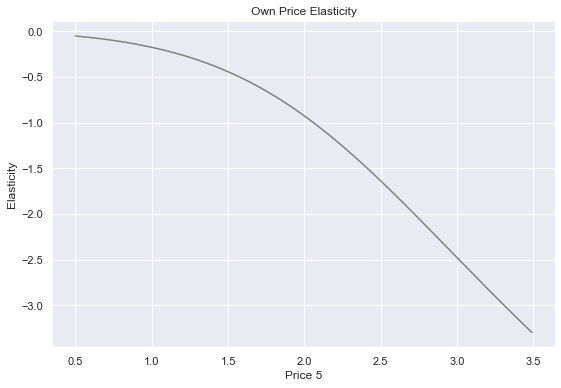

In [123]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity')

## Cross Price Elasticity Brand 5, Cross Brand 4

In [125]:
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

In [126]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [127]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [129]:
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [130]:
beta5

-1.09

In [131]:
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

In [133]:
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticitity_Promotion_1,Brand_5_Cross_Brand_4
0,0.50,-0.096000,-0.119114,-0.030917,-0.168048,-0.125436,0.332011
1,0.51,-0.100060,-0.123297,-0.032684,-0.172972,-0.129538,0.337287
2,0.52,-0.104247,-0.127573,-0.034538,-0.177967,-0.133720,0.342507
3,0.53,-0.108565,-0.131945,-0.036482,-0.183032,-0.137981,0.347668
4,0.54,-0.113017,-0.136412,-0.038521,-0.188169,-0.142322,0.352773
5,0.55,-0.117605,-0.140977,-0.040659,-0.193378,-0.146745,0.357820
6,0.56,-0.122333,-0.145641,-0.042901,-0.198659,-0.151250,0.362809
7,0.57,-0.127205,-0.150406,-0.045250,-0.204012,-0.155839,0.367741
8,0.58,-0.132224,-0.155273,-0.047712,-0.209439,-0.160513,0.372614
9,0.59,-0.137394,-0.160244,-0.050292,-0.214939,-0.165271,0.377429


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt Brand 4')

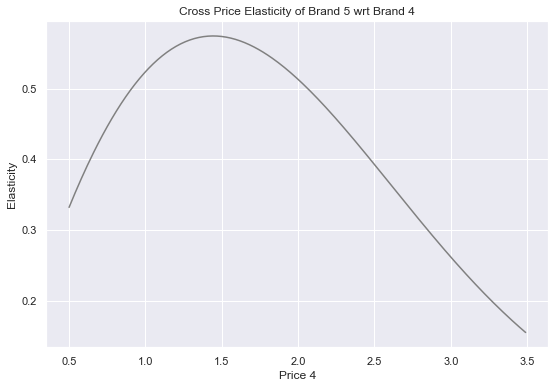

In [134]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt Brand 4')